# Jenn Allen's Visualizations for WHO Mortality Data
These visualizations are based on World Health Organization (WHO) mortality data for a set of [12 countries](../source_data/filtered_countries.csv).

### Do Imports, Load Data, and Create DataFrames

In [487]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Load the WHO mortality data
df_mort = pd.read_csv('../source_data/current_who_mortality_2017_2021.csv')

# Load the WHO population data
df_pop = pd.read_csv('../source_data/current_who_population.csv')

In [488]:
# Create a function to display the total deaths in a year, with country optional


def total_deaths(df, year=None, country=""):
    # Step 1: Filter the DataFrame for the specified country if provided
    if country:
        filtered_df = df[df['Country Name'] == country]
    else:
        filtered_df = df

    # Step 2: Filter the DataFrame for the specified year if provided
    if year:
        filtered_df = filtered_df[filtered_df['Year'] == year]

    # Step 3: Filter for ICD Code 'AAA'
    filtered_df = filtered_df[filtered_df['ICD Code'] == 'AAA']

    # Step 4: Sum the number of deaths
    total_deaths = filtered_df['Deaths: All Ages'].sum()

    # Step 5: Return the result
    return total_deaths

### Function to Display the Total Deaths (Year and Country are Optional)

In [489]:
# Sum of all deaths for 2017 - 2021
print(f"Total deaths from 2017 to 2021: {total_deaths(df_mort):,}")

# Sum of deaths for 2017
print(f"Total deaths in 2017: {total_deaths(df_mort, 2017):,}")

# Sum of deaths for 2018
print(f"Total deaths in 2018: {total_deaths(df_mort, 2018):,}")

# Sum of deaths for 2019
print(f"Total deaths in 2019: {total_deaths(df_mort, 2019):,}")

# Sum of deaths for 2020
print(f"Total deaths in 2020: {total_deaths(df_mort, 2020):,}")

# Sum of deaths for 2021
print(f"Total deaths in 2021: {total_deaths(df_mort, 2021):,}")

Total deaths from 2017 to 2021: 35,681,090
Total deaths in 2017: 6,600,541
Total deaths in 2018: 6,642,894
Total deaths in 2019: 6,717,207
Total deaths in 2020: 7,603,703
Total deaths in 2021: 8,116,745


### Function to Display the Top 10 Causes of Death in a Year (Country is Optional)

In [490]:
# Create a function to display the top 10 causes of death in a year

def top_causes_death_yearly(df, year, country=""):
    # Step 1: Filter the DataFrame for the specified year and country
    if country:
        filtered_df = df[(df['Year'] == year) & (df['Country Name'] == country)]
    else:
        filtered_df = df[df['Year'] == year]

    # Step 2: Group by ICD codes and sum the number of deaths
    icd_deaths = filtered_df.groupby('ICD Code')['Deaths: All Ages'].sum().reset_index()
    icd_deaths.columns = ['ICD Code', 'Deaths: All Ages']

    # Step 3: Exclude the 'AAA' ICD code since it applies to total deaths from all causes
    icd_deaths = icd_deaths[icd_deaths['ICD Code'] != 'AAA']

    # Step 4: Select the top 10 ICD codes based on the total number of deaths
    top_10_icd_codes = icd_deaths.nlargest(10, 'Deaths: All Ages')

    # Step 5: Merge with the ICD Category column
    top_10_with_category = top_10_icd_codes.merge(filtered_df[['ICD Code', 'ICD Category']].drop_duplicates(), on='ICD Code', how='left')

    # Step 6: Return the result
    return top_10_with_category

### Top Causes of Death in 2020 and 2021
This shows deaths for each year in our dataset (2017 - 2021). Reminder: our dataset is filtered to a set of [12 countries](../source_data/filtered_countries.csv).

In [491]:
# Top causes of death for 2017
top_causes_2017 = top_causes_death_yearly(df_mort, 2017)
print(f"The top causes of death for 2017:")
display(top_causes_2017)
print("***" * 50)

# Top causes of death for 2018
top_causes_2018 = top_causes_death_yearly(df_mort, 2018)
print(f"The top causes of death for 2018:")
display(top_causes_2018)
print("***" * 50)

# Top causes of death for 2019
top_causes_2019 = top_causes_death_yearly(df_mort, 2019)
print(f"The top causes of death for 2019:")
display(top_causes_2019)
print("***" * 50)

# Top causes of death for 2020
top_causes_2020 = top_causes_death_yearly(df_mort, 2020)
print(f"The top causes of death for 2020:")
display(top_causes_2020)
print("***" * 50)

# Top causes of death for 2021
top_causes_2021 = top_causes_death_yearly(df_mort, 2021)
print(f"The top causes of death for 2021:")
display(top_causes_2021)

The top causes of death for 2017:


,ICD Code,Deaths: All Ages,ICD Category
0,C349,281747,Neoplasms
1,I219,266528,Circulatory system diseases
2,J189,207943,Respiratory system diseases
3,I251,198422,Circulatory system diseases
4,J449,161289,Respiratory system diseases
5,F03,157420,"Mental, behavioral, and neurodevelopmental dis..."
6,G309,157215,Nervous system diseases
7,R54,124986,"Symptoms, signs and abnormal clinical and labo..."
8,I509,118914,Circulatory system diseases
9,I64,115476,Circulatory system diseases


******************************************************************************************************************************************************
The top causes of death for 2018:


,ICD Code,Deaths: All Ages,ICD Category
0,C349,276659,Neoplasms
1,I219,259476,Circulatory system diseases
2,J189,204501,Respiratory system diseases
3,I251,198285,Circulatory system diseases
4,J449,160640,Respiratory system diseases
5,F03,159909,"Mental, behavioral, and neurodevelopmental dis..."
6,G309,157344,Nervous system diseases
7,R54,137398,"Symptoms, signs and abnormal clinical and labo..."
8,I509,124818,Circulatory system diseases
9,I500,114542,Circulatory system diseases


******************************************************************************************************************************************************
The top causes of death for 2019:


,ICD Code,Deaths: All Ages,ICD Category
0,C349,274362,Neoplasms
1,I219,254373,Circulatory system diseases
2,J189,203085,Respiratory system diseases
3,I251,197767,Circulatory system diseases
4,F03,159748,"Mental, behavioral, and neurodevelopmental dis..."
5,J449,159417,Respiratory system diseases
6,G309,156065,Nervous system diseases
7,R54,153695,"Symptoms, signs and abnormal clinical and labo..."
8,I509,130462,Circulatory system diseases
9,I500,114263,Circulatory system diseases


******************************************************************************************************************************************************
The top causes of death for 2020:


,ICD Code,Deaths: All Ages,ICD Category
0,U071,624177,Codes for special purposes
1,C349,269087,Neoplasms
2,I219,252688,Circulatory system diseases
3,I251,208005,Circulatory system diseases
4,J189,172954,Respiratory system diseases
5,G309,168186,Nervous system diseases
6,F03,164883,"Mental, behavioral, and neurodevelopmental dis..."
7,R54,164267,"Symptoms, signs and abnormal clinical and labo..."
8,J449,152925,Respiratory system diseases
9,R99,132996,"Symptoms, signs and abnormal clinical and labo..."


******************************************************************************************************************************************************
The top causes of death for 2021:


,ICD Code,Deaths: All Ages,ICD Category
0,U071,955850,Codes for special purposes
1,C349,269377,Neoplasms
2,I219,258364,Circulatory system diseases
3,I251,214475,Circulatory system diseases
4,R54,173254,"Symptoms, signs and abnormal clinical and labo..."
5,J189,159063,Respiratory system diseases
6,G309,156431,Nervous system diseases
7,F03,154453,"Mental, behavioral, and neurodevelopmental dis..."
8,J449,147485,Respiratory system diseases
9,I509,136727,Circulatory system diseases


#### Calculate and plot total deaths by Sex, year-over-year

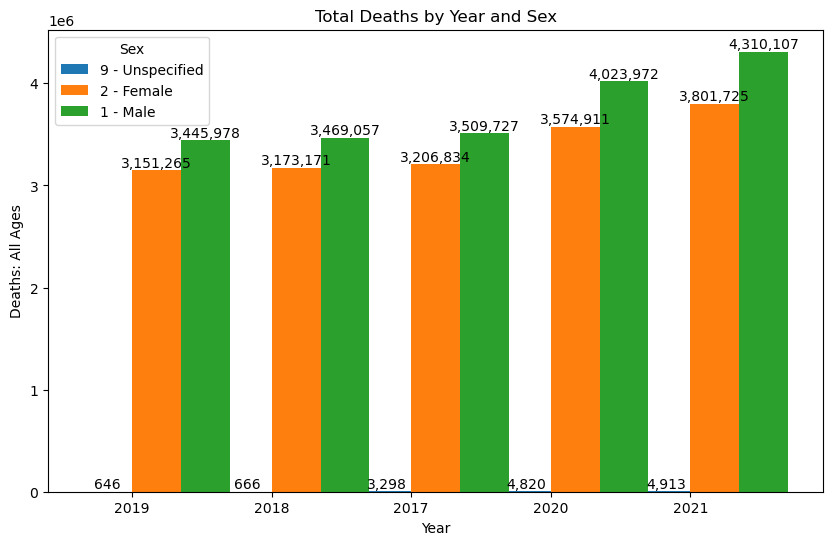

In [492]:

# Group by 'Year' and 'Sex' and sum the deaths
df_filter_icd_aaa = df_mort[df_mort['ICD Code'] != 'AAA']
df_grouped = df_filter_icd_aaa.groupby(['Year', 'Sex'])
sum_yearly_deaths_by_sex = df_grouped[['Deaths: All Ages']].sum().reset_index()

# Sort the data by the total number of deaths
sum_yearly_deaths_by_sex = sum_yearly_deaths_by_sex.sort_values(by='Deaths: All Ages')

# Plot the data
plt.figure(figsize=(10, 6))

# Define the width of each bar
bar_width = 0.35

# Get the unique years and sexes
years = sum_yearly_deaths_by_sex['Year'].unique()
sexes = sum_yearly_deaths_by_sex['Sex'].unique()

# Create an array of positions for the bars
r = np.arange(len(years))

# Plot each sex's data
for i, sex in enumerate(sexes):
    subset = sum_yearly_deaths_by_sex[sum_yearly_deaths_by_sex['Sex'] == sex]
    bars = plt.bar(r + i * bar_width, subset['Deaths: All Ages'], width=bar_width, label=sex)

    # Add text annotations
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{int(yval):,}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Deaths: All Ages')
plt.title('Total Deaths by Year and Sex')
plt.xticks(r + bar_width / 2, years)
plt.legend(title='Sex')
plt.show()

### Get and Plot Total Deaths for All Countries with Population Data

In [493]:
pd.options.display.float_format = '{:,.0f}'.format

# Group the Population dataframe by 'Pop: All Ages' column
df_pop_filtered = df_pop[df_pop['Year'].between(2017, 2021)]
df_pop_filtered = df_pop_filtered.groupby(['Year', 'Country Name'])['Pop: All Ages'].sum().reset_index()

# Rename the column to 'Total Population'
df_pop_filtered = df_pop_filtered.rename(columns={'Pop: All Ages': 'Total Population'})

# Convert 'Pop: All Ages' to millions
# df_pop_filtered['Total Population'] = df_pop_filtered['Total Population'] / 1_000_000

# df_pop_filtered = df_pop_filtered.rename(columns={'Total Population':'Population in Millions'})

# Display the first few rows
display(df_pop_filtered)

,Year,Country Name,Total Population
0,2017,Australia,"24,594,202"
1,2017,Iceland,"343,400"
2,2017,Israel,"8,713,268"
3,2017,Japan,"124,648,471"
4,2017,Poland,"37,962,318"
5,2017,Singapore,"3,965,796"
6,2017,Sweden,"10,057,698"
7,2018,Australia,"24,963,258"
8,2018,Iceland,"352,720"
9,2018,Israel,"8,882,765"


In [494]:
# Create a DataFrame of deaths per year

# Filter to the 'AAA' ICD Code since that applies to the total deaths for all ICD Codes
df_filtered_grouped_deaths = df_mort[df_mort['ICD Code'] == 'AAA']

# Group by Year + Country and Deaths
df_grouped_deaths = df_filtered_grouped_deaths.groupby(['Year', 'Country Name'])['Deaths: All Ages'].sum().reset_index()

# Rename columns
df_grouped_deaths = df_grouped_deaths.rename(columns={'Deaths: All Ages':'All Causes of Death'})

# Convert the 'All Deaths' column to integer
df_grouped_deaths['All Causes of Death'] = df_grouped_deaths['All Causes of Death'].fillna(0).astype(int)

# Apply comma formatting
# df_grouped_deaths['All Causes of Death'] = df_grouped_deaths['All Causes of Death'].map(lambda x: f"{x:,}")

# Display first few rows
display(df_grouped_deaths.head())

,Year,Country Name,All Causes of Death
0,2017,Australia,161083
1,2017,Brazil,1312664
2,2017,Canada,276689
3,2017,Chile,106388
4,2017,Iceland,2236


# Create Scatterplot for 

In [495]:
# Group by Year + Country and Deaths
df_filtered_grouped_deaths = df_mort[df_mort['ICD Code'] != 'AAA']
df_grouped_deaths = df_filtered_grouped_deaths.groupby(['Year', 'Country Name'])['Deaths: All Ages'].sum().reset_index()

# Rename columns
df_grouped_deaths = df_grouped_deaths.rename(columns={'Deaths: All Ages':'All Causes of Death'})

# Convert the 'All Deaths' column to integer
df_grouped_deaths['All Causes of Death'] = df_grouped_deaths['All Causes of Death'].fillna(0).astype(int)

# Merge the two DataFrames on 'Year' and 'Country Name'
df_merged = pd.merge(df_pop_filtered, df_grouped_deaths, on=['Year', 'Country Name'])

# Calculate the percentage of the population that died in each year
df_merged['Percentage'] = (df_merged['All Causes of Death'] / df_merged['Total Population']) * 100

# Apply comma formatting to the 'All Causes of Death' and 'Total Population' columns
# df_merged['All Causes of Death'] = df_merged['All Causes of Death'].map(lambda x: f"{x:,}")
# df_merged['Total Population'] = df_merged['Total Population'].map(lambda x: f"{x:,}")

# Format the percentage column to show two decimal places
df_merged['Percentage'] = df_merged['Percentage'].map(lambda x: f"{x:.2f}")

# Display the merged DataFrame
display(df_merged.head())

,Year,Country Name,Total Population,All Causes of Death,Percentage
0,2017,Australia,"24,594,202",161083,0.65
1,2017,Iceland,"343,400",2236,0.65
2,2017,Israel,"8,713,268",44596,0.51
3,2017,Japan,"124,648,471",1340397,1.08
4,2017,Poland,"37,962,318",402852,1.06


In [496]:
# Create a DataFrame to exclude 'AAA' so that we don't double-count. AAA represents deaths from all ICD codes.
df_mort_filtered_no_aaa = df_mort[df_mort['ICD Code'] != 'AAA']
top_5_by_country_year = df_mort_filtered_no_aaa.groupby(['Year', 'Country Name']).apply(
    lambda x: x.nlargest(5, 'Deaths: All Ages')
).reset_index(drop=True)

# Display the result
#top_5_by_country_year


df_mort_all = df_mort[df_mort['ICD Code'] == 'AAA']
display(df_mort_all)

/var/folders/rr/f4rnf7xj5tj1x2gknbjs4mxm0000gn/T/ipykernel_50972/470299333.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_by_country_year = df_mort_filtered_no_aaa.groupby(['Year', 'Country Name']).apply(


,Year,Country Code,Country Name,Region,Sex,ICD Code,ICD Category,ICD10 Version,Deaths: All Ages,Deaths: 0-1 Years,Deaths: 1-24 Years,Deaths: 25-44 Years,Deaths: 45-69 Years,Deaths: 70-95+ Years,Deaths: Age Not Specified,Age Format,Deaths: Smoketest All Ages
5,2017,4160,Iceland,Northern Europe,1 - Male,AAA,Infectious and parasitic diseases,103,1124,5,24,47,320,507,0,0,"1,124"
185,2017,4160,Iceland,Northern Europe,2 - Female,AAA,Infectious and parasitic diseases,103,1112,5,11,17,203,626,0,0,"1,112"
388,2017,1520,Tunisia,Africa,1 - Male,AAA,Infectious and parasitic diseases,104,14818,827,491,751,"4,037","4,009","2,630",2,"14,818"
1249,2017,1520,Tunisia,Africa,2 - Female,AAA,Infectious and parasitic diseases,104,10822,656,283,421,"2,279","4,219","1,430",2,"10,822"
1956,2017,1520,Tunisia,Africa,9 - Unspecified,AAA,Infectious and parasitic diseases,104,2655,52,5,7,33,61,"2,484",2,"2,655"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205083,2019,5020,Australia,Oceania,2 - Female,AAA,Infectious and parasitic diseases,104,80851,433,833,"2,410","16,357","41,585",0,0,"80,851"
208665,2020,5020,Australia,Oceania,1 - Male,AAA,Infectious and parasitic diseases,104,84588,518,"1,750","3,911","24,652","35,820",6,0,"84,588"
208666,2020,5020,Australia,Oceania,2 - Female,AAA,Infectious and parasitic diseases,104,76712,425,761,"2,257","15,557","39,054",1,0,"76,712"
212108,2021,5020,Australia,Oceania,1 - Male,AAA,Infectious and parasitic diseases,104,89401,559,"1,697","3,744","25,381","38,738",4,0,"89,401"


In [497]:
# Create a pivot table to summarize total deaths by ICD code for each country and year
pivot_table = pd.pivot_table(
    df_mort_filtered_no_aaa, 
    values='Deaths: All Ages', 
    index=['Country Name', 'Year'], 
    columns=['ICD Code'], 
    aggfunc='sum'
)

# Reset the index to make 'Country Name' and 'Year' columns
pivot_table_reset = pivot_table.reset_index()

# Melt the pivot table to long format
melted = pivot_table_reset.melt(id_vars=['Country Name', 'Year'], var_name='ICD Code', value_name='Deaths')

# Rank the ICD codes within each country and year based on the number of deaths
melted['Rank'] = melted.groupby(['Country Name', 'Year'])['Deaths'].rank(method='first', ascending=False)

# Filter to include only the top 5 ICD codes for each country and year
top_5 = melted[melted['Rank'] <= 5]

# Sort by country, year, and rank
top_5_sorted = top_5.sort_values(by=['Country Name', 'Year', 'Rank'])

# Display the sorted DataFrame
display(top_5_sorted)

,Country Name,Year,ICD Code,Deaths,Rank
46226,Australia,2017,C349,"8,141",1
110838,Australia,2017,F03,"8,078",2
153410,Australia,2017,I219,"7,530",3
154396,Australia,2017,I259,"6,786",4
163560,Australia,2017,I64,"4,297",5
...,...,...,...,...,...
329149,United States of America,2021,U071,"416,893",1
154105,United States of America,2021,I251,"162,314",2
46283,United States of America,2021,C349,"130,222",3
132239,United States of America,2021,G309,"112,004",4


In [498]:
df_pop_filtered.columns

Index(['Year', 'Country Name', 'Total Population'], dtype='object')

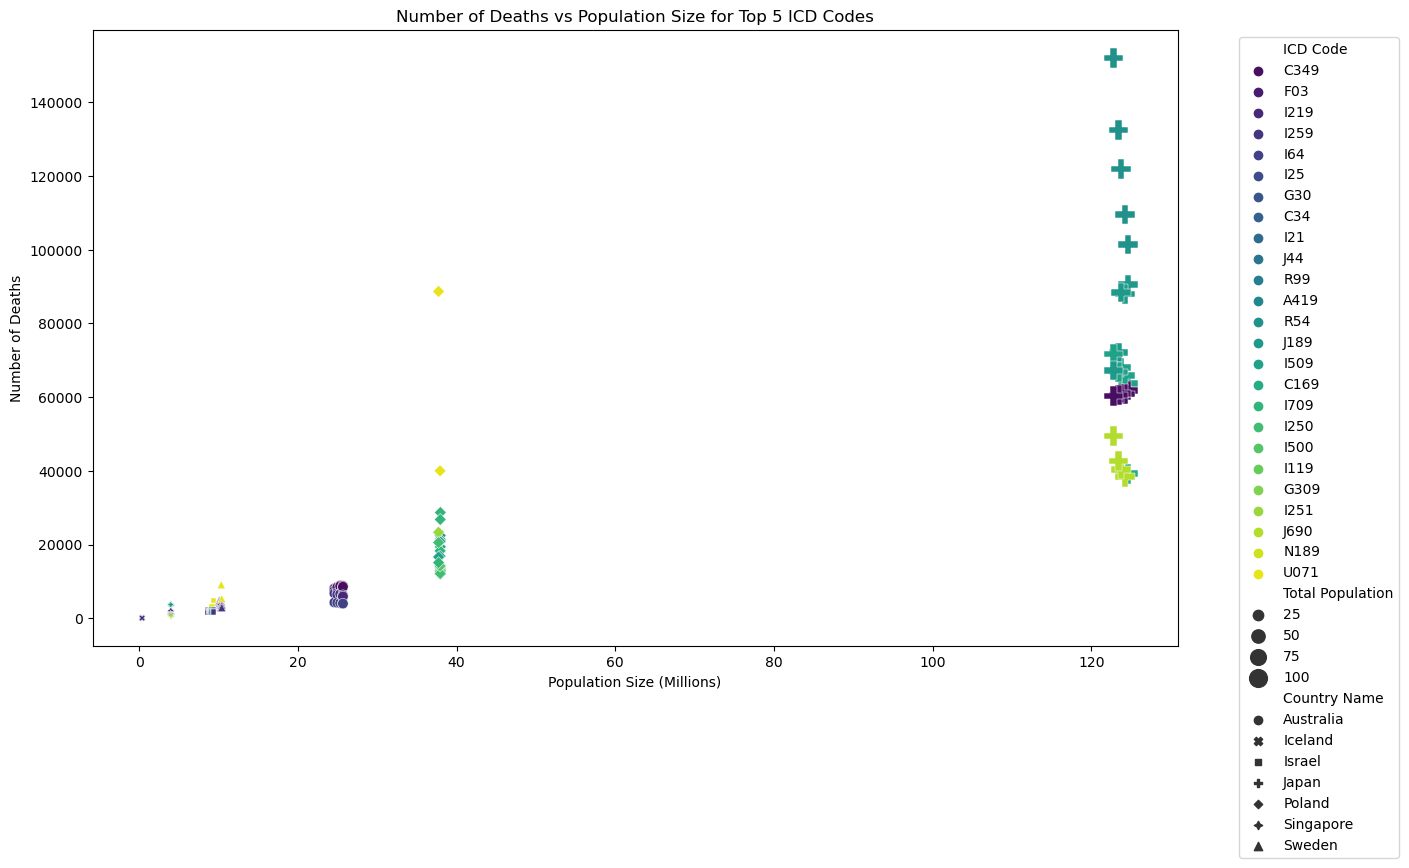

In [499]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Assuming df_pop_filtered and top_5_sorted are already defined and filtered

# Merge the population data with the deaths data
df_merged = pd.merge(df_pop_filtered, top_5_sorted, on=['Year', 'Country Name'])

# Filter out Brazil
df_merged = df_merged[df_merged['Country Name'] != 'Brazil']

# Convert 'Total Population' to millions
df_merged['Total Population'] = df_merged['Total Population'] / 1_000_000

# Create the bubble plot
plt.figure(figsize=(14, 8))
bubble_plot = sns.scatterplot(
    data=df_merged, 
    x='Total Population', 
    y='Deaths', 
    hue='ICD Code', 
    style='Country Name', 
    size='Total Population', 
    sizes=(20, 200), 
    palette='viridis'
)

# Set the x-axis formatter to ScalarFormatter and disable scientific notation
bubble_plot.xaxis.set_major_formatter(ScalarFormatter())
bubble_plot.ticklabel_format(style='plain', axis='x')

# Customize the plot
bubble_plot.set_title('Number of Deaths vs Population Size for Top 5 ICD Codes')
bubble_plot.set_xlabel('Population Size (Millions)')
bubble_plot.set_ylabel('Number of Deaths')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

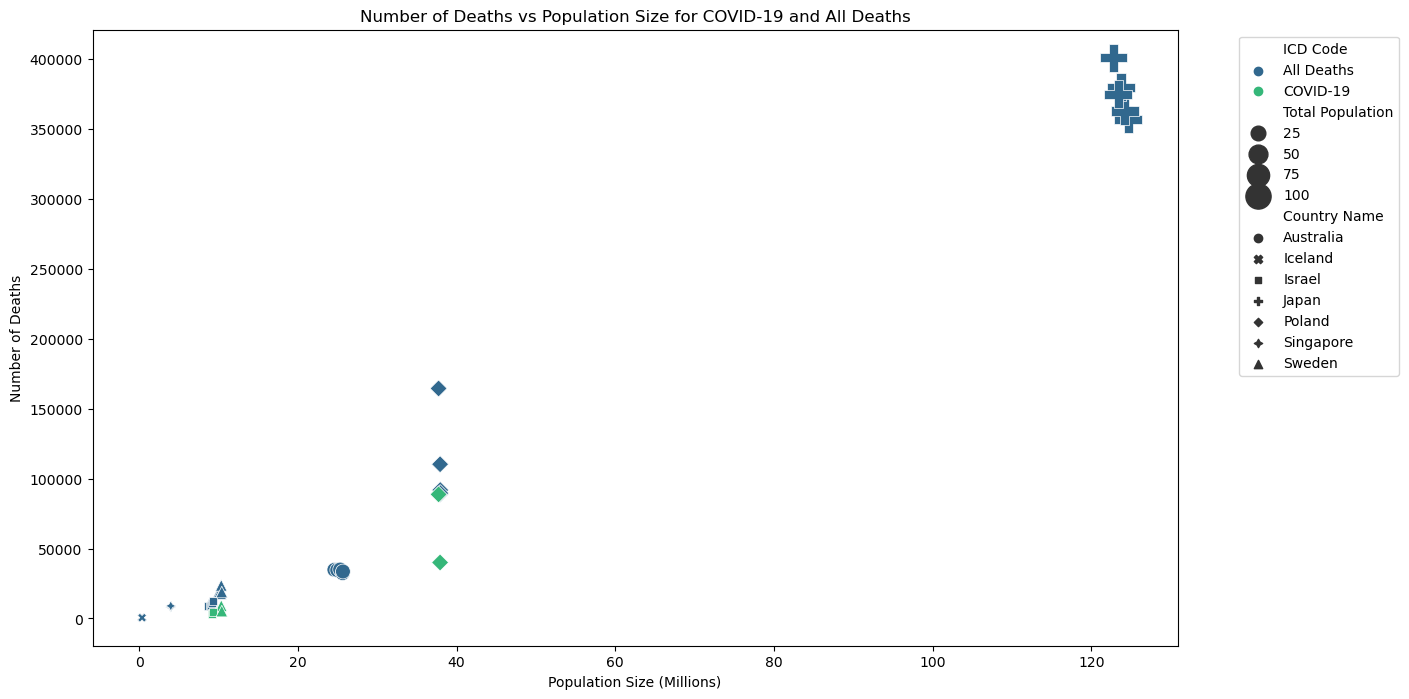

In [500]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Assuming df_pop_filtered and top_5_sorted are already defined and filtered

# Merge the population data with the deaths data
df_merged = pd.merge(df_pop_filtered, top_5_sorted, on=['Year', 'Country Name'])

# Sum up deaths across all ICD codes
total_deaths = df_merged.groupby(['Year', 'Country Name', 'Total Population'])['Deaths'].sum().reset_index()
total_deaths['ICD Code'] = 'All Deaths'

# Filter the DataFrame to get COVID-19 specific codes
covid_codes = ['U071', 'U072']  # Example COVID-19 ICD codes
covid_deaths = df_merged[df_merged['ICD Code'].isin(covid_codes)].groupby(['Year', 'Country Name', 'Total Population'])['Deaths'].sum().reset_index()
covid_deaths['ICD Code'] = 'COVID-19'

# Combine the total deaths and COVID-19 deaths
comparison_df = pd.concat([total_deaths, covid_deaths])

# Ensure 'Total Population' and 'Deaths' are numeric
comparison_df['Total Population'] = pd.to_numeric(comparison_df['Total Population'], errors='coerce')
comparison_df['Deaths'] = pd.to_numeric(comparison_df['Deaths'], errors='coerce')

# Drop rows with NaN values in 'Total Population' or 'Deaths'
comparison_df.dropna(subset=['Total Population', 'Deaths'], inplace=True)

# Filter out Brazil
comparison_df = comparison_df[comparison_df['Country Name'] != 'Brazil']

# Convert 'Total Population' to millions
comparison_df['Total Population'] = comparison_df['Total Population'] / 1_000_000

# Create the bubble plot
plt.figure(figsize=(14, 8))
bubble_plot = sns.scatterplot(
    data=comparison_df, 
    x='Total Population', 
    y='Deaths', 
    hue='ICD Code', 
    style='Country Name', 
    size='Total Population', 
    sizes=(40, 400), 
    palette='viridis'
)

# Set the x-axis formatter to ScalarFormatter and disable scientific notation
bubble_plot.xaxis.set_major_formatter(ScalarFormatter())
bubble_plot.ticklabel_format(style='plain', axis='x')

# Add labels to each cluster
# for line in range(0, comparison_df.shape[0]):
#    plt.annotate(
#        comparison_df['Country Name'].iloc[line],
#        (comparison_df['Total Population'].iloc[line], comparison_df['Deaths'].iloc[line]),
#        textcoords="offset points",
#        xytext=(5,5),
#        ha='left'
#    )

# Customize the plot
bubble_plot.set_title('Number of Deaths vs Population Size for COVID-19 and All Deaths')
bubble_plot.set_xlabel('Population Size (Millions)')
bubble_plot.set_ylabel('Number of Deaths')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [501]:


# Group by Year + Country and Deaths
df_filtered_grouped_deaths = df_mort[df_mort['ICD Code'] != 'AAA']
df_grouped_deaths = df_filtered_grouped_deaths.groupby(['Year', 'Country Name'])['Deaths: All Ages'].sum().reset_index()

# Rename columns
df_grouped_deaths = df_grouped_deaths.rename(columns={'Deaths: All Ages':'All Causes of Death'})

# Convert the 'All Deaths' column to integer
df_grouped_deaths['All Causes of Death'] = df_grouped_deaths['All Causes of Death'].fillna(0).astype(int)

# Merge the two DataFrames on 'Year' and 'Country Name'
df_merged = pd.merge(df_pop_filtered, df_grouped_deaths, on=['Year', 'Country Name'])

# Calculate the percentage of the population that died in each year
df_merged['Percentage'] = (df_merged['All Causes of Death'] / df_merged['Total Population']) * 100

# Apply comma formatting to the 'All Causes of Death' and 'Total Population' columns
# df_merged['All Causes of Death'] = df_merged['All Causes of Death'].map(lambda x: f"{x:,}")
# df_merged['Total Population'] = df_merged['Total Population'].map(lambda x: f"{x:,}")

# Format the percentage column to show two decimal places
df_merged['Percentage'] = df_merged['Percentage'].map(lambda x: f"{x:.2f}")

# Display the merged DataFrame
display(df_merged.head())



# ---




import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Filter for COVID-19 ICD codes and years 2020 and 2021
covid_icd_codes_new = ['U071', 'U072']
df_covid_new = df_mort_filtered[(df_mort_filtered['ICD Code'].isin(covid_icd_codes_new)) & (df_mort_filtered['Year'].isin([2020, 2021]))]

# Filter for years 2017-2019
df_pre_covid_new = df_mort_filtered[df_mort_filtered['Year'].isin([2017, 2018, 2019])]

# Group by 'Country Name' and calculate the sum for 'Total Population', 'COVID Deaths', and 'COVID Percentage' for 2020-2021
df_covid_grouped_new = df_covid_new.groupby('Country Name').agg({
    'Total Population': 'sum',
    'COVID Deaths': 'sum',
    'COVID Percentage': 'mean'
}).reset_index()

# Group by 'Country Name' and calculate the sum for 'Total Population', 'All Causes of Death', and 'Death Percentage' for 2017-2019
df_pre_covid_grouped_new = df_pre_covid_new.groupby('Country Name').agg({
    'Total Population': 'sum',
    'All Causes of Death': 'sum',
    'Death Percentage': 'mean'
}).reset_index()

# Extract the relevant columns for plotting
countries_new = df_covid_grouped_new['Country Name']
total_population_new = df_covid_grouped_new['Total Population']
covid_deaths_new = df_covid_grouped_new['COVID Deaths']
covid_percentage_new = df_covid_grouped_new['COVID Percentage']

pre_covid_countries_new = df_pre_covid_grouped_new['Country Name']
pre_covid_total_population_new = df_pre_covid_grouped_new['Total Population']
pre_covid_deaths_new = df_pre_covid_grouped_new['All Causes of Death']
pre_covid_percentage_new = df_pre_covid_grouped_new['Death Percentage']

# Normalize the percentages for bubble size
bubble_size_new = covid_percentage_new * 1000  # Adjust the scaling factor as needed
pre_covid_bubble_size_new = pre_covid_percentage_new * 1000  # Adjust the scaling factor as needed

# Create the bubble charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

# Plot for 2020-2021
scatter_new = ax1.scatter(total_population_new, covid_deaths_new, s=bubble_size_new, alpha=0.6, edgecolors='k', linewidth=0.5, label='COVID-19 Deaths')
ax1.set_title('Impact of COVID-19 on Deaths in Relation to Population Size (2020-2021)')
ax1.set_xlabel('Total Population')
ax1.set_ylabel('COVID-19 Deaths')
ax1.xaxis.set_major_formatter(FuncFormatter(comma_formatter))
ax1.yaxis.set_major_formatter(FuncFormatter(comma_formatter))
for i, country in enumerate(countries_new):
    ax1.annotate(country, 
                 (total_population_new[i], covid_deaths_new[i]), 
                 xytext=(5, -5),  # Offset position
                 textcoords='offset points', 
                 fontsize=7, 
                 alpha=0.8,
                 ha='left',  # Horizontal alignment
                 va='top')   # Vertical alignment
ax1.legend()

# Plot for 2017-2019
scatter_pre_covid_new = ax2.scatter(pre_covid_total_population_new, pre_covid_deaths_new, s=pre_covid_bubble_size_new, alpha=0.6, edgecolors='k', linewidth=0.5, label='All Causes of Death')
ax2.set_title('Impact of All Causes of Death in Relation to Population Size (2017-2019)')
ax2.set_xlabel('Total Population')
ax2.set_ylabel('All Causes of Death')
ax2.xaxis.set_major_formatter(FuncFormatter(comma_formatter))
ax2.yaxis.set_major_formatter(FuncFormatter(comma_formatter))
for i, country in enumerate(pre_covid_countries_new):
    ax2.annotate(country, 
                 (pre_covid_total_population_new[i], pre_covid_deaths_new[i]), 
                 xytext=(5, -5),  # Offset position
                 textcoords='offset points', 
                 fontsize=7, 
                 alpha=0.8,
                 ha='left',  # Horizontal alignment
                 va='top')   # Vertical alignment
ax2.legend()

# Show the plots
plt.show()

,Year,Country Name,Total Population,All Causes of Death,Percentage
0,2017,Australia,"24,594,202",161083,0.65
1,2017,Iceland,"343,400",2236,0.65
2,2017,Israel,"8,713,268",44596,0.51
3,2017,Japan,"124,648,471",1340397,1.08
4,2017,Poland,"37,962,318",402852,1.06


KeyError: "Column(s) ['COVID Deaths', 'COVID Percentage', 'Total Population'] do not exist"